In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#importing datasets
store_df = pd.read_csv(r"C:\Group\store - store.csv")
orders_df = pd.read_csv(r"C:\Group\retail_orders_W23 - retail_orders_W23.csv")
retail_df = pd.read_csv(r"C:\Group\retail_data_W23 - retail_data_W23.csv")

### Store Data

In [3]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [5]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [6]:
#Summary Stats
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Orders Data

In [7]:
orders_df.head()

,Id,Orders
0,409,8314
1,427,13995
2,445,4822
3,463,5651
4,535,7185


In [8]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651013 entries, 0 to 651012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Id      651013 non-null  int64
 1   Orders  651013 non-null  int64
dtypes: int64(2)
memory usage: 9.9 MB


In [9]:
orders_df.isnull().sum()

Id        0
Orders    0
dtype: int64

In [10]:
#Summary Stats
orders_df.describe()

,Id,Orders
count,6.510130e+05,651013.000000
mean,9.153619e+06,5770.521006
std,5.285944e+06,3851.171979
min,4.090000e+02,0.000000
25%,4.578709e+06,3721.000000
50%,9.151915e+06,5743.000000
75%,1.373353e+07,7856.000000
max,1.831010e+07,38722.000000


### Retail Data

In [11]:
retail_df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,3,5,2015-07-31,821,1,1,0,1,409
1,4,5,2015-07-31,1498,1,1,0,1,427
2,5,5,2015-07-31,559,1,1,0,1,445
3,6,5,2015-07-31,589,1,1,0,1,463
4,10,5,2015-07-31,681,1,1,0,1,535


In [12]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651013 entries, 0 to 651012
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          651013 non-null  int64 
 1   DayOfWeek      651013 non-null  int64 
 2   Date           651013 non-null  object
 3   Customers      651013 non-null  int64 
 4   Open           651013 non-null  int64 
 5   Promo          651013 non-null  int64 
 6   StateHoliday   651013 non-null  object
 7   SchoolHoliday  651013 non-null  int64 
 8   Id             651013 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 44.7+ MB


In [13]:
retail_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Id               0
dtype: int64

In [14]:
#Summary Stats
retail_df.describe()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Id
count,651013.000000,651013.000000,651013.000000,651013.000000,651013.000000,651013.000000,6.510130e+05
mean,558.645629,3.999336,632.851832,0.829619,0.381558,0.178927,9.153619e+06
std,321.905872,1.998260,464.857658,0.375967,0.485769,0.383292,5.285944e+06
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.090000e+02
25%,281.000000,2.000000,404.000000,1.000000,0.000000,0.000000,4.578709e+06
50%,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,9.151915e+06
75%,838.000000,6.000000,837.000000,1.000000,1.000000,0.000000,1.373353e+07
max,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,1.831010e+07


### Merging Retail Data with Order Data

In [15]:
# Merge the retail data with the order data using the 'Id' column
merged_data = pd.merge(retail_df, orders_df, on="Id", how="inner")

# Drop the 'Id' column
merged_data.drop("Id", axis=1, inplace=True)

In [16]:
merged_data.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Orders
0,3,5,2015-07-31,821,1,1,0,1,8314
1,4,5,2015-07-31,1498,1,1,0,1,13995
2,5,5,2015-07-31,559,1,1,0,1,4822
3,6,5,2015-07-31,589,1,1,0,1,5651
4,10,5,2015-07-31,681,1,1,0,1,7185


In [17]:
# No of days total and Min-Max Date of the retail data
print(merged_data.Date.value_counts().sum(),'no of days')
print(merged_data.Date.min(),'min date')
print(merged_data.Date.max(),'max date')

651013 no of days
2013-01-01 min date
2015-07-31 max date


In [18]:
# extract year, month, day and week of year from "Date"
merged_data.Date = pd.to_datetime(merged_data.Date)
merged_data['Year'] = merged_data.Date.apply(lambda x:x.year)
merged_data['Month'] = merged_data.Date.apply(lambda x:x.month)
merged_data['Day'] = merged_data.Date.apply(lambda x:x.day)
merged_data['WeekOfYear'] = merged_data.Date.apply(lambda x:x.weekofyear)

<Figure size 1200x800 with 0 Axes>

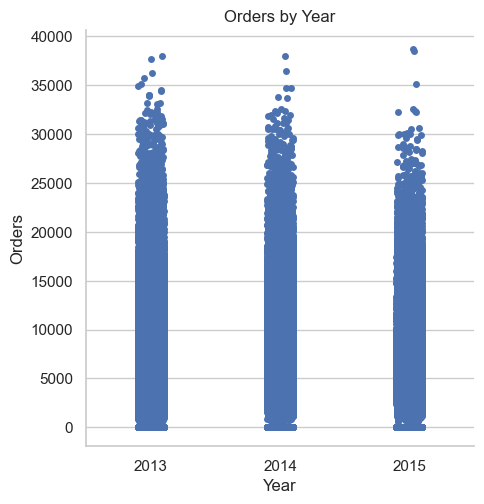

In [19]:
# Distribution of Orders on Years
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.catplot(x='Year', y='Orders', data=merged_data, height=5, aspect=1)
plt.title("Orders by Year")
plt.xlabel("Year")
plt.ylabel("Orders")
plt.show()

In [20]:
merged_data.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
merged_data.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Orders,Year,Month,Day,WeekOfYear
0,3,5,2015-07-31,821,1,1,0,1,8314,2015,7,31,31
1,4,5,2015-07-31,1498,1,1,0,1,13995,2015,7,31,31
2,5,5,2015-07-31,559,1,1,0,1,4822,2015,7,31,31
3,6,5,2015-07-31,589,1,1,0,1,5651,2015,7,31,31
4,10,5,2015-07-31,681,1,1,0,1,7185,2015,7,31,31


### Explonatory Data Analysis For Retail and Orders Datasets (by using Merged Data)

In [21]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651013 entries, 0 to 651012
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          651013 non-null  int64         
 1   DayOfWeek      651013 non-null  int64         
 2   Date           651013 non-null  datetime64[ns]
 3   Customers      651013 non-null  int64         
 4   Open           651013 non-null  int64         
 5   Promo          651013 non-null  int64         
 6   StateHoliday   651013 non-null  object        
 7   SchoolHoliday  651013 non-null  int64         
 8   Orders         651013 non-null  int64         
 9   Year           651013 non-null  int64         
 10  Month          651013 non-null  int64         
 11  Day            651013 non-null  int64         
 12  WeekOfYear     651013 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 64.6+ MB


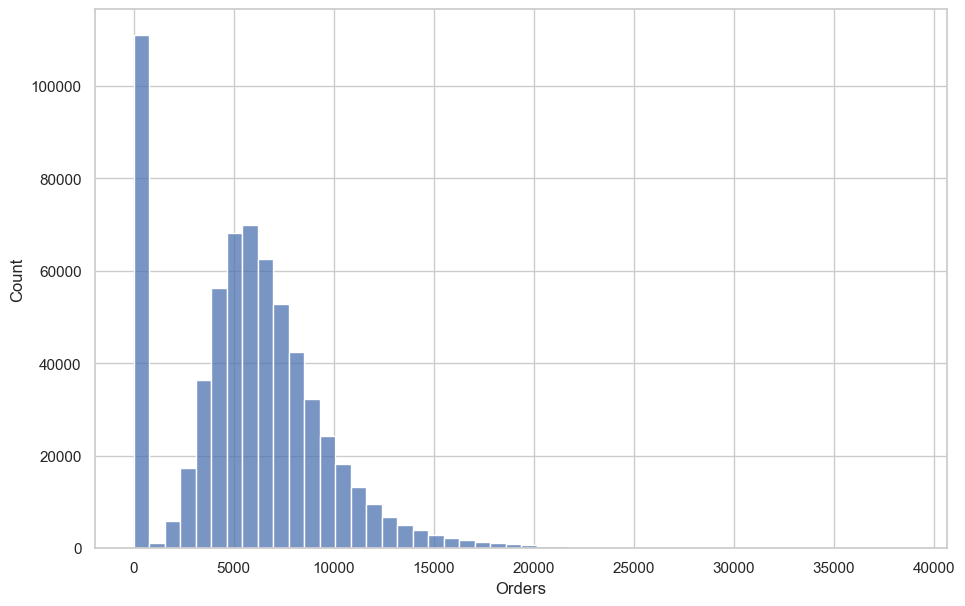

In [22]:
# Distribution of Orders
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(merged_data['Orders'], bins=50);

In [23]:
#Count of the zero amount Orders
len(merged_data[merged_data['Orders'] == 0])

110950

In [24]:
#Check for common characteristics of zero ORDERS
zero_orders_indices = merged_data[merged_data['Orders'] == 0].index

# Extract the rows where 'Orders' is zero
zero_orders_df = merged_data.loc[zero_orders_indices]

# Check for common characteristics in other columns
common_characteristics = zero_orders_df[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear']].mode()
print("Common Characteristics of Rows with Zero Orders:")
print(common_characteristics)

Common Characteristics of Rows with Zero Orders:
   Store  DayOfWeek  Open  Promo StateHoliday  SchoolHoliday  Year  Month  \
0    103          7     0      0            0              0  2013      5   

   Day  WeekOfYear  
0    1           1  


In [25]:
# Create a new column 'Orders_Group' based on the 'Orders' column
zero_orders_df['Orders_Group'] = zero_orders_df['Orders'].apply(lambda x: 'Zero_Orders' if x == 0 else 'Have_Orders')

# Group by 'Orders_Group' and 'Open', and count the values in each group
zero_orders_df.groupby(['Orders_Group', 'Open']).size().reset_index(name='Count')

,Orders_Group,Open,Count
0,Zero_Orders,0,110920
1,Zero_Orders,1,30


<Axes: xlabel='DayOfWeek', ylabel='count'>

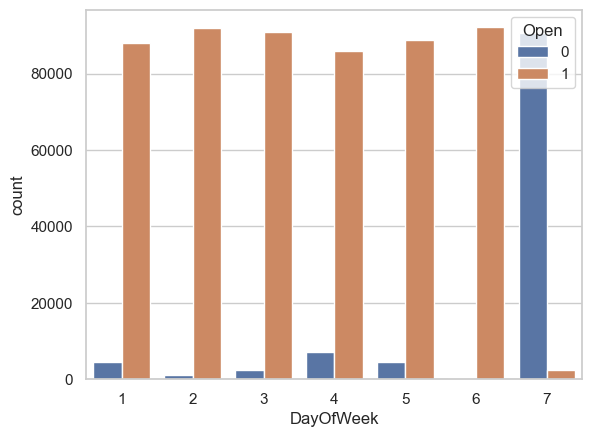

In [26]:
# Finding in which days stores are closed (0 : closed)
sns.countplot(x='DayOfWeek',hue='Open',data=merged_data)

<Axes: xlabel='Promo', ylabel='Orders'>

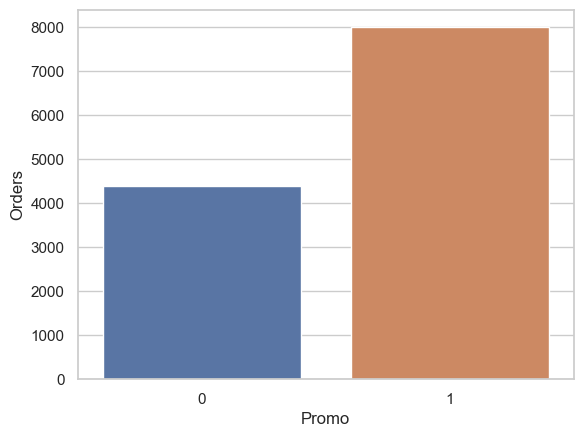

In [27]:
#Finding order means when there is a promotion
Promo_sales = pd.DataFrame(merged_data.groupby('Promo').agg({'Orders':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Orders'])

In [28]:
# Because most of the records with Open=0 have Orders=0, removing these records
merged_data = merged_data[merged_data['Orders']!=0]

In [29]:
# Removing 'open' column because there are only open=1 records left
merged_data = merged_data.drop('Open', axis=1)

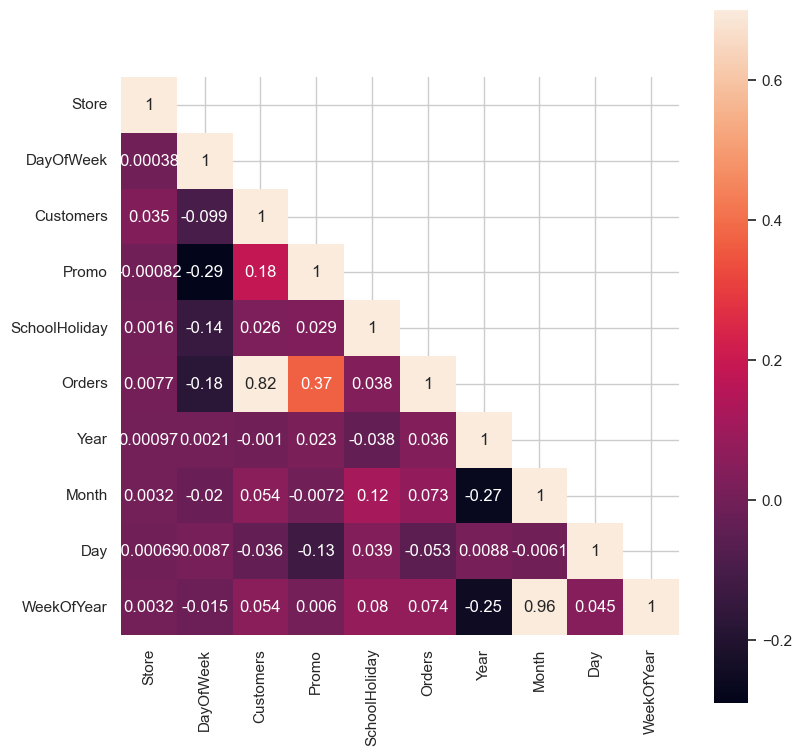

In [30]:
# Select only integer columns
number_columns = merged_data.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for integer columns
correlation_map = merged_data[number_columns].corr()

# Create a heatmap
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
sns.heatmap(correlation_map, mask=obj, vmax=0.7, square=True, annot=True)

plt.show()

In [31]:
# Feautes Correlation with Orders Above 40 
correlation_with_orders = correlation_map["Orders"]

threshold = 0.4
highly_correlated_features = correlation_with_orders[abs(correlation_with_orders) > threshold].index.tolist()

print(highly_correlated_features)

['Customers', 'Orders']


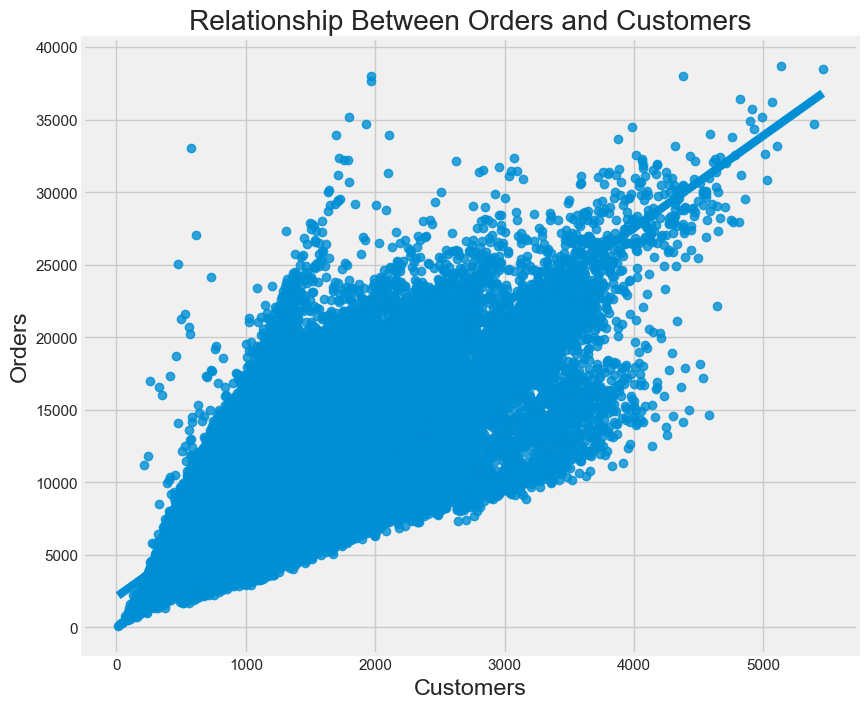

In [32]:
# Relationship between Customers and Orders columns
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Relationship Between Orders and Customers")

sns.regplot(x="Customers", y="Orders", data=merged_data)
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Orders'>

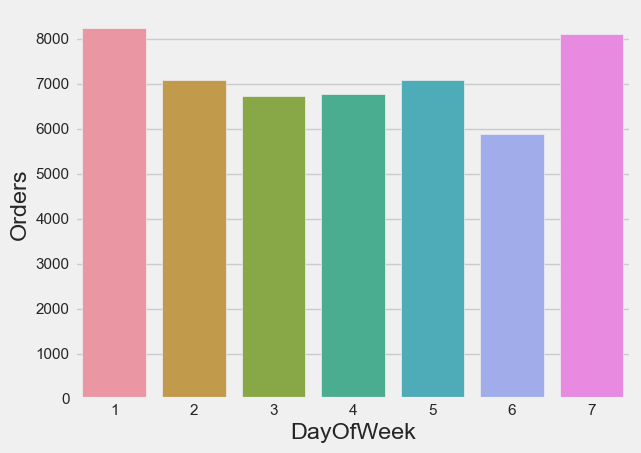

In [33]:
#Finding order means by DayOfWeek
Promo_sales = pd.DataFrame(merged_data.groupby('DayOfWeek').agg({'Orders':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Orders'])

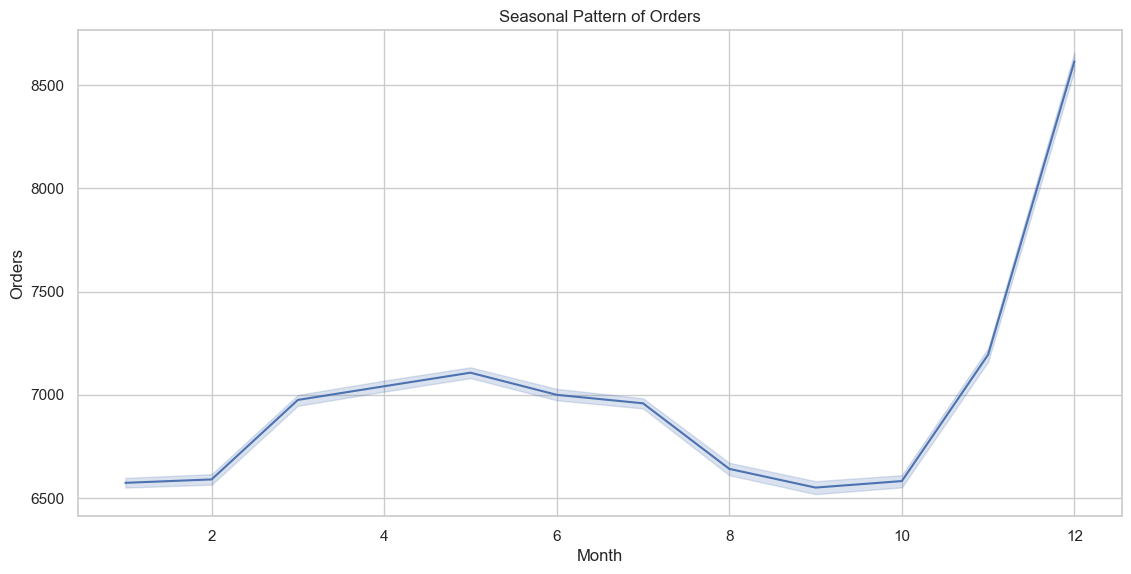

In [34]:
#Seasonality of orders
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a line plot to visualize seasonality
sns.lineplot(x="Month", y="Orders", data=merged_data)

plt.title("Seasonal Pattern of Orders")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.show()

### Explonatory Data Analysis For Store Df

In [35]:
# Exploring null values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [36]:
# Removing the columns with null ratio above 20%

# Calculate the fill rate for each column
fill_rate = store_df.count() / len(store_df)

# Set a threshold for fill rate (e.g., 80%)
threshold = 0.8

# Get the column names where the fill rate is below the threshold
columns_to_remove = fill_rate[fill_rate < threshold].index

# Drop the columns with fill rate below the threshold
store_df = store_df.drop(columns=columns_to_remove)

In [37]:
store_df.isnull().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    3
Promo2                 0
dtype: int64

In [38]:
#Replacing null values with mean in CompetitionDistance columns
mean_competition_distance = store_df['CompetitionDistance'].mean()

store_df['CompetitionDistance'].fillna(mean_competition_distance, inplace=True)

In [39]:
#Checking null values after filling and removing some columns
store_df.isnull().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [40]:
#Distribution of store type
store_df.StoreType.value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

In [41]:
#Distribution of assortment
store_df.Assortment.value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

### Merging all datasets

In [42]:
df_final = pd.merge(merged_data, store_df, how='left', on='Store')
df_final.head()

,Store,DayOfWeek,Date,Customers,Promo,StateHoliday,SchoolHoliday,Orders,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,3,5,2015-07-31,821,1,0,1,8314,2015,7,31,31,a,a,14130.0,1
1,4,5,2015-07-31,1498,1,0,1,13995,2015,7,31,31,c,c,620.0,0
2,5,5,2015-07-31,559,1,0,1,4822,2015,7,31,31,a,a,29910.0,0
3,6,5,2015-07-31,589,1,0,1,5651,2015,7,31,31,a,a,310.0,0
4,10,5,2015-07-31,681,1,0,1,7185,2015,7,31,31,a,a,3160.0,0


In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540063 entries, 0 to 540062
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                540063 non-null  int64         
 1   DayOfWeek            540063 non-null  int64         
 2   Date                 540063 non-null  datetime64[ns]
 3   Customers            540063 non-null  int64         
 4   Promo                540063 non-null  int64         
 5   StateHoliday         540063 non-null  object        
 6   SchoolHoliday        540063 non-null  int64         
 7   Orders               540063 non-null  int64         
 8   Year                 540063 non-null  int64         
 9   Month                540063 non-null  int64         
 10  Day                  540063 non-null  int64         
 11  WeekOfYear           540063 non-null  int64         
 12  StoreType            540063 non-null  object        
 13  Assortment    

In [44]:
# Checking any values in the final dataset
df_final.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Customers              0
Promo                  0
StateHoliday           0
SchoolHoliday          0
Orders                 0
Year                   0
Month                  0
Day                    0
WeekOfYear             0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

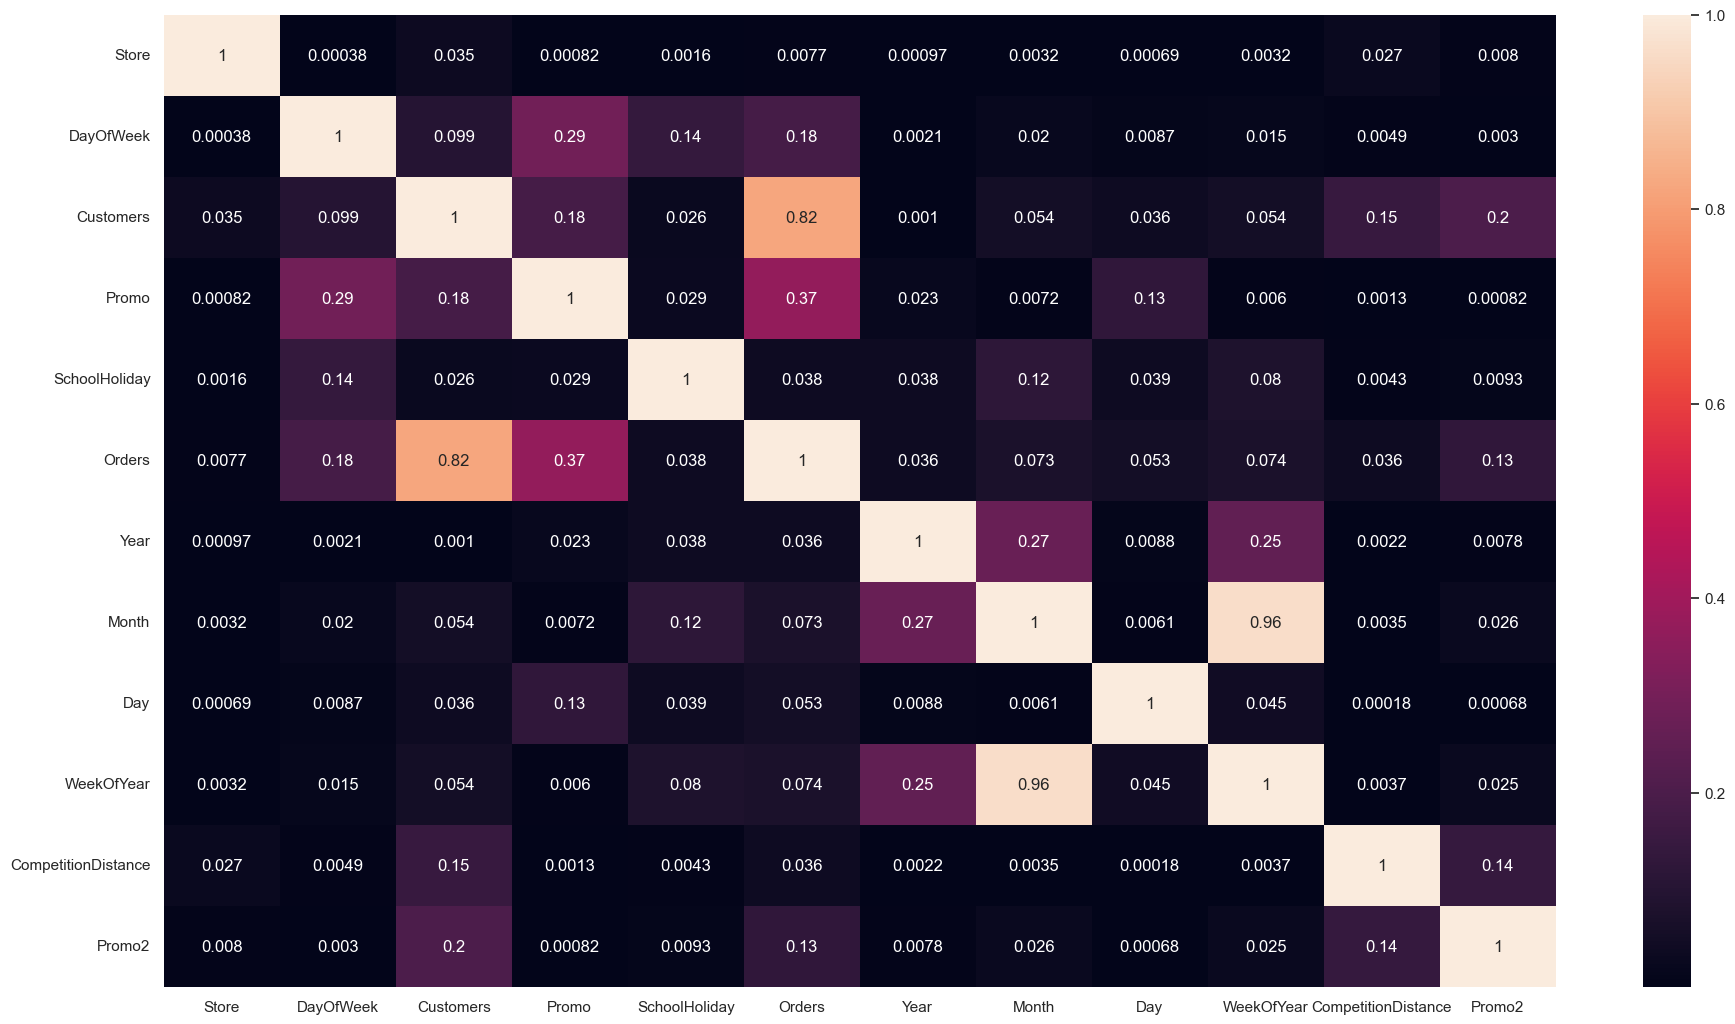

In [45]:
# Correlation matrix
numeric_df = df_final.select_dtypes(include=['number'])  
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix.abs(), annot=True)
plt.show()

### TRAIN TEST SPLIT

In [46]:
df_final.columns

Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Orders', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2'],
      dtype='object')

In [47]:
X = df_final.drop(['Store','Orders','Date', 'Year', 'Month', 'Day', 'WeekOfYear'] , axis = 1)
y= df_final['Orders']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1989)

<Axes: >

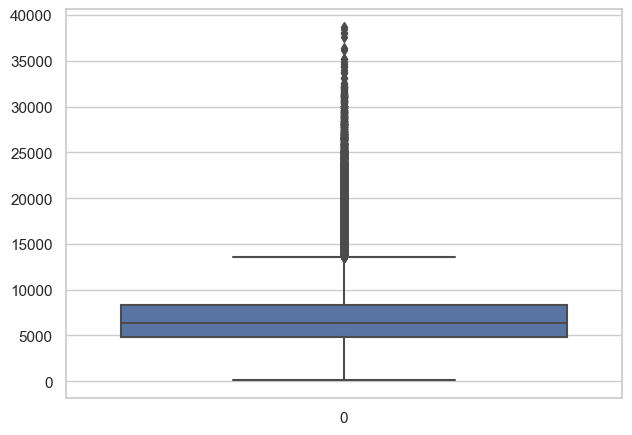

In [49]:
#checking outliers in Orders
sns.boxplot(y_train)

In [50]:
# Calculate the Z-scores for y_train
scaler = StandardScaler()
y_train_z = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Define a threshold (e.g., ±3) for identifying outliers
threshold = 3

# Find the indices of outlier data points in y_train
outlier_indices = (y_train_z > threshold) | (y_train_z < -threshold)

# Get the indices of outliers
outlier_indices = outlier_indices.flatten()

# Remove outliers from both y_train and X_train
y_train = y_train[~outlier_indices]
X_train = X_train[~outlier_indices]

In [51]:
X_train

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
411713,2,362,0,0,1,a,a,2460.0,1
127336,6,197,0,0,0,d,c,11120.0,1
351527,4,343,0,0,0,a,a,1600.0,1
446515,1,1017,0,0,0,c,a,2240.0,0
495182,6,361,0,0,0,a,a,18620.0,1
...,...,...,...,...,...,...,...,...,...
496154,4,424,0,0,0,a,c,350.0,1
533839,5,863,1,0,0,d,a,300.0,1
164295,2,501,0,0,0,c,c,1540.0,1
441381,3,506,1,0,0,a,a,2330.0,1


In [52]:
# Encoding Categoric Columns
columns_to_encode = ['StoreType', 'Assortment', 'StateHoliday']

# Create separate copies of X_train and X_test
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# LabelEncoder
LE = LabelEncoder()

# Fit and transform the selected columns for X_train
for column in columns_to_encode:
    X_train_encoded[column] = LE.fit_transform(X_train[column])

# Fit and transform the selected columns for X_test
for column in columns_to_encode:
    X_test_encoded[column] = LE.fit_transform(X_test[column])

In [53]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372005 entries, 411713 to 201532
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            372005 non-null  int64  
 1   Customers            372005 non-null  int64  
 2   Promo                372005 non-null  int64  
 3   StateHoliday         372005 non-null  int32  
 4   SchoolHoliday        372005 non-null  int64  
 5   StoreType            372005 non-null  int32  
 6   Assortment           372005 non-null  int32  
 7   CompetitionDistance  372005 non-null  float64
 8   Promo2               372005 non-null  int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 24.1 MB


In [54]:
# Add a constant column to the DataFrame (required for VIF calculation)
X_with_const = add_constant(X_train_encoded)

# Calculate VIF for each independent variable
vif_values = pd.DataFrame()
vif_values["Variable"] = X_with_const.columns
vif_values["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF values
print(vif_values)


              Variable        VIF
0                const  18.472459
1            DayOfWeek   1.110206
2            Customers   1.161626
3                Promo   1.121967
4         StateHoliday   1.002630
5        SchoolHoliday   1.020598
6            StoreType   1.108157
7           Assortment   1.083910
8  CompetitionDistance   1.083795
9               Promo2   1.080487


In [55]:
# Calculate the correlation between each feature and the target variable
correlation_with_target = X_train_encoded.corrwith(y_train)

# Print the correlation results
print(correlation_with_target)

DayOfWeek             -0.183382
Customers              0.782994
Promo                  0.394889
StateHoliday           0.009488
SchoolHoliday          0.039074
StoreType              0.010940
Assortment             0.109368
CompetitionDistance   -0.015203
Promo2                -0.107390
dtype: float64


In [56]:
X_train_encoded.columns

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2'],
      dtype='object')

### Linear Regression

In [57]:
# Create an instance of the LinearRegression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train_encoded, y_train)

# Predict on training data
prediction_train = lin_reg.predict(X_train_encoded)

# Predict on testing data
prediction_test = lin_reg.predict(X_test_encoded)

In [58]:
# Function to evaluate model
def evaluation(y, predictions):
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse) 
    r_squared = r2_score(y, predictions)
    return mse, rmse, r_squared

In [59]:
# Train Evaluation
mse,rmse,r_squared = evaluation(y_train, prediction_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "LinearRegression","MSE": mse, "RMSE": rmse, "R2 Score": r_squared}

MSE: 2009461.6803554788
RMSE: 1417.5548244619954
R2 Score: 0.7167195481005721


In [60]:
# Test Evaluation
mse,rmse,r_squared = evaluation(y_test, prediction_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "LinearRegression","MSE": mse, "RMSE": rmse, "R2 Score": r_squared}

MSE: 2326357.8907802426
RMSE: 1525.2402731308412
R2 Score: 0.7580262356273259
